In [1]:
# Mengimpor Library
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [2]:
# Menentukan Variabel Kasus

x_minta = np.arange(0, 6000, 1)
x_sedia = np.arange(0, 700, 1)
x_produksi = np.arange(0, 9000, 1)

In [3]:
# Menentukan Range Himpunan Fuzzy
minta_sd = fuzz.trapmf(x_minta, [0, 0, 1000, 5000])
minta_by = fuzz.trapmf(x_minta, [1000, 5000, 6000, 6000])

sedia_sd = fuzz.trapmf(x_sedia, [0, 0, 100, 600])
sedia_by = fuzz.trapmf(x_sedia, [100, 600, 700, 700])

produksi_kr  = fuzz.trapmf(x_produksi, [0, 0, 2000, 7000])
produksi_tb = fuzz.trapmf(x_produksi, [2000, 7000, 9000, 9000])

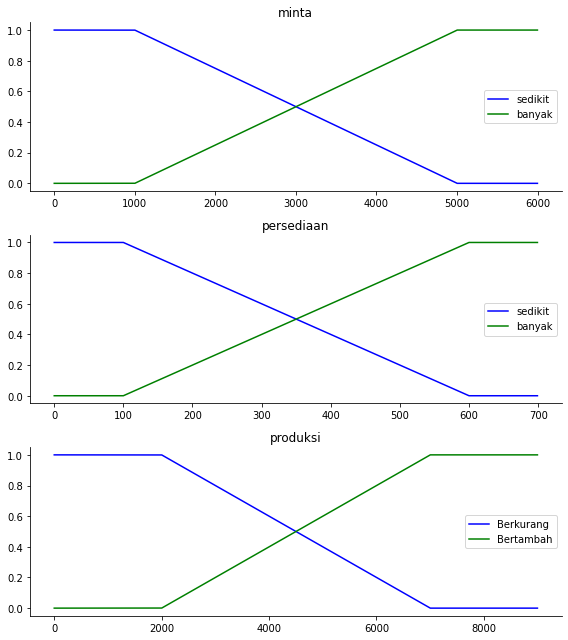

In [11]:
# Membuat Grafik Himpunan Fuzzy
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x_minta, minta_sd, 'b', linewidth=1.5, label='sedikit')
ax0.plot(x_minta, minta_by, 'g', linewidth=1.5, label='banyak')

ax0.set_title('minta')
ax0.legend()

ax1.plot(x_sedia, sedia_sd, 'b', linewidth=1.5, label='sedikit')
ax1.plot(x_sedia, sedia_by, 'g', linewidth=1.5, label='banyak')

ax1.set_title('persediaan')
ax1.legend()

ax2.plot(x_produksi, produksi_kr, 'b', linewidth=1.5, label='Berkurang')
ax2.plot(x_produksi, produksi_tb, 'g', linewidth=1.5, label='Bertambah')

ax2.set_title('produksi')
ax2.legend()

for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [5]:
# Menginput Nilai Kasus
minta = 3000
sedia = 300

In [6]:
# Menentukan Rule Base
"""
•R1, Variabel permintaan terdiri atas 2 himpunan fuzzy, yaitu banyak dan sedikit
•R2, Variabel persediaan terdiri atas 2 himpunan fuzzy, yaitu banyak dan sedikit
•R3, Variabel produksi terdiri atas 2 himpunan fuzzy, yaitu bertambah dan berkurang
""";

In [7]:
# Menentukan Derajat Keanggotaan
a = []
a.append(fuzz.interp_membership(x_minta, minta_sd, minta))
a.append(fuzz.interp_membership(x_minta, minta_by, minta))

b = []
b.append(fuzz.interp_membership(x_sedia, sedia_sd, sedia))
b.append(fuzz.interp_membership(x_sedia, sedia_by, sedia))

print("Derajat Keanggotaan Persediaan ")
if a[0] > 0 :
    print("Sedikit : "+str(a[0]))
if a[1] > 0 :
    print("Banyak  : "+ str(a[1]))

print("")
print("Derajat Keanggotaan Permintaan")
if b[0]>0 :
    print("Sedikit : "+str(b[0]))
if b[1]>0 :
    print("Banyak  : "+ str(b[1]))

Derajat Keanggotaan Persediaan 
Sedikit : 0.5
Banyak  : 0.5

Derajat Keanggotaan Permintaan
Sedikit : 0.6
Banyak  : 0.4


In [9]:
# Memodelkan Rule Base dan inferensi Mamdani
x1 = np.fmin(a[0], b[0])
apred1 = np.fmin(x1, [0])
print("Rendah, Nilai apred1 = ", apred1)
z1 = 5000 - (2000 * apred1)
print("Nilai z1 = ", z1)

x2 = np.fmin(a[0], b[0])
apred2 = np.fmin(x2, [1])
print("Rendah, Nilai apred2 = ", apred2)
z2 = 7000 - (5000 * apred2)
print("Nilai z2 = ", z2)

x3 = np.fmin(a[0], b[1])
apred3 = np.fmin(x3, [0])
print("Rendah, Nilai apred3 = ", apred3)
z3 = 7000 - (5000 * apred3)
print("Nilai z3 = ", z3)

x4 = np.fmin(a[0], b[1])
apred4 = np.fmin(x4, [1])
print("Tinggi, Nilai apred4 = ", apred4)
z4 = (5000 * apred4) + 2000
print("Nilai z4 = ", z4)


Rendah, Nilai apred1 =  [0.]
Nilai z1 =  [5000.]
Rendah, Nilai apred2 =  [0.5]
Nilai z2 =  [4500.]
Rendah, Nilai apred3 =  [0.]
Nilai z3 =  [7000.]
Tinggi, Nilai apred4 =  [0.4]
Nilai z4 =  [4000.]


In [32]:
## Defazzyfication
z = (apred1*z1 + apred2*z2 + apred3*z3 + apred4*z4)/ (apred1 + apred2+ apred3 + apred4)

In [34]:
print("Barang yang harus di produksi : "+str(int(z)))

Barang yang harus di produksi : 4277
